In [2]:
import numpy as np
import pandas as pd
import matplotlib



In [3]:
import rdkit
print(rdkit.__version__)

2023.03.1


In [12]:
!wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


In [14]:
sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [17]:
sol['SMILES'][0]

'ClCC(Cl)(Cl)Cl'

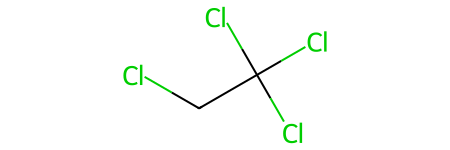

In [19]:
from rdkit import Chem

m = Chem.MolFromSmiles(sol['SMILES'][0])
m

In [20]:
# 元素数
m.GetNumAtoms()

6

In [21]:
mol_list = [Chem.MolFromSmiles(element) for element in sol['SMILES']]
len(mol_list)

1144

In [22]:
from rdkit.Chem import Descriptors

def calculate_three_descriptors(smiles, verbose=False):
    
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
        
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])
        
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i = i + 1
        
    columnNames = ["MolLogP","MolWt","NumRotatableBonds"]
    # RotatableBonds:回転可能な結合の数・MolWt：分子量
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    
    return descriptors



In [23]:
df = calculate_three_descriptors(sol['SMILES'])
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [25]:
# AP（芳香族の比率）を求める。
m = Chem.MolFromSmiles('CNC(=O)Oc1cc(C)cc(C)c1')

aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms


[False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True]

In [27]:
def AromaticAtoms(m):
    aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
    aa_count = []
    for i in aromatic_atoms:
        if i == True:
            aa_count.append(i)
        
    sum_aa_count = len(aa_count)
    return sum_aa_count

In [28]:
AromaticAtoms(m)

6

In [29]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms
#SMILEデータのベンゼン環に関連する原子数

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

In [30]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticAtoms, columns=['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0
1,0
2,0
3,0
4,0
...,...
1139,0
1140,6
1141,16
1142,12


In [ ]:
X = pd.concat([df, df_desc_AromaticProportion], axis=1)